<a href="https://colab.research.google.com/github/nascimento-luciano/Artificial-Intelligence/blob/master/Lista2_Exerc%C3%ADcio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Aula prática: rede neural para regressão não linear com keras*

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 17501/20000
7/7 - 0s - loss: 2.2666e-04
Epoch 17502/20000
7/7 - 0s - loss: 2.4187e-04
Epoch 17503/20000
7/7 - 0s - loss: 2.2633e-04
Epoch 17504/20000
7/7 - 0s - loss: 2.4001e-04
Epoch 17505/20000
7/7 - 0s - loss: 2.3323e-04
Epoch 17506/20000
7/7 - 0s - loss: 2.5637e-04
Epoch 17507/20000
7/7 - 0s - loss: 2.8705e-04
Epoch 17508/20000
7/7 - 0s - loss: 2.7122e-04
Epoch 17509/20000
7/7 - 0s - loss: 2.6027e-04
Epoch 17510/20000
7/7 - 0s - loss: 2.2956e-04
Epoch 17511/20000
7/7 - 0s - loss: 2.3531e-04
Epoch 17512/20000
7/7 - 0s - loss: 2.4573e-04
Epoch 17513/20000
7/7 - 0s - loss: 2.3056e-04
Epoch 17514/20000
7/7 - 0s - loss: 2.4479e-04
Epoch 17515/20000
7/7 - 0s - loss: 2.5476e-04
Epoch 17516/20000
7/7 - 0s - loss: 2.2821e-04
Epoch 17517/20000
7/7 - 0s - loss: 2.5997e-04
Epoch 17518/20000
7/7 - 0s - loss: 2.2646e-04
Epoch 17519/20000
7/7 - 0s - loss: 2.2425e-04
Epoch 17520/20000
7/7 - 0s - loss: 2.3243e-04
Epoch 17521/20000
7/7

Text(0, 0.5, 'y')

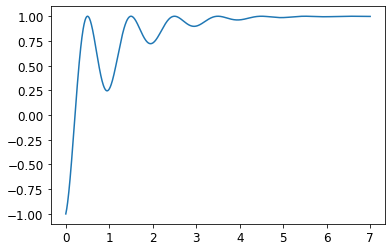

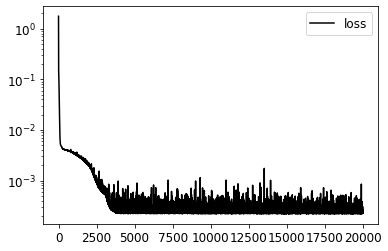

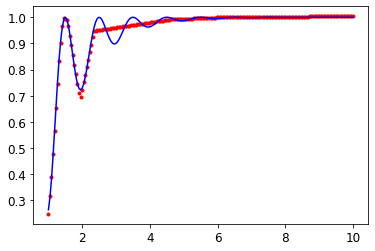

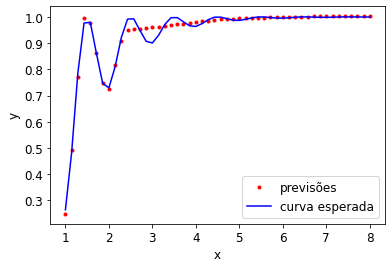

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def fobj(X): 
  OF=(1-np.exp(-X)*(np.cos(2*np.pi*X)+1)) #Cria uma subrotina para definir para definir a função que faremos a regressão não-linear
  return OF
xx=np.linspace(0,7,1000)
y=fobj(xx)
plt.plot(xx,y)

#criando o data set de treino e teste
s_d=200                                   #quantos Dtrain
s_t=50                                    #quantos Dtest

x_train = np.linspace(1,10.0,s_d)       #Define a entrada de treinamento da rede
y_train = fobj(x_train)                 #Define as saídas de treinamento da rede, usando a subrotina
x_test=np.linspace(1,8,s_t)             #Define a entrada de teste da rede
y_test=fobj(x_test)                     #Define a saída de teste da rede.
#criando a rede neural
model=tf.keras.Sequential(name='rede_regressao_nao_linear')                      #Compilação da rede neural, definindo o otimizador e a função de Loss
#configurando as camadas da rede para 4 camadas
model.add(tf.keras.layers.Dense(18, input_dim=1, use_bias=1,activation='relu'))  #Adicionando camadas na rede neural
model.add(tf.keras.layers.Dense(24, activation='relu'))                          #É a função de ativação. A funçã o “linear” é a padrão;
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))                         #Adicionando camadas na rede neural

#compilando a rede
opt=tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,loss='mean_squared_error')
print(model.summary())                                                           #Mostra na tela um resumo da rede neural
#treinando a rede
history=model.fit(x_train, y_train, epochs=20000, verbose=2)
#mostra a performace do treinamento da rede
plt.rcParams.update({'font.size':12})
plt.figure()
plt.semilogy(history.history['loss'],'k')
plt.legend(['loss'])
#testando a rede
y_pred=model.predict(x_test)
#mostra o resultado do ajuste em relação ao esperado
plt.figure()
plt.plot(x_train, model.predict(x_train),'r.')
plt.plot(x_train, y_train, 'b-')
plt.figure()
plt.plot(x_test, y_pred,'r.')
plt.plot(x_test, y_test, 'b-')
plt.legend(['previsões', 'curva esperada'])
plt.xlabel('x');plt.ylabel('y')